In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [55]:
sns.set_style('darkgrid')


In [56]:
adult_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [57]:
adult_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [58]:
adult_df.columns = ['age',
                  'working_class',
                  'final_weight',
                  'education',
                  'edu_number',
                  'marital_status',
                  'occupation',
                  'relationship',
                  'race',
                  'sex',
                  'cap_gain',
                  'cap_loss',
                  'hours_week',
                  'native_country',
                  'make_50K']

In [123]:
Y = adult_df.make_50K
adult_df.head()

,age,working_class,final_weight,education,edu_number,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_week,native_country,make_50K,marital_category,race_category
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,4
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2,2
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,2,4


In [60]:
adult_df.isnull().sum()

age               0
working_class     0
final_weight      0
education         0
edu_number        0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
cap_gain          0
cap_loss          0
hours_week        0
native_country    0
make_50K          0
dtype: int64

In [61]:
adult_df.describe()

,age,final_weight,edu_number,cap_gain,cap_loss,hours_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


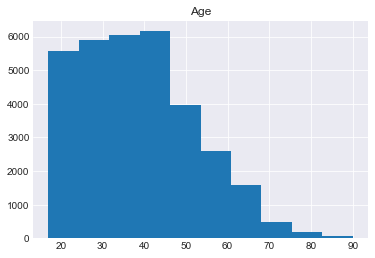

In [183]:
plt.hist(adult_df['age'])
plt.title('Age')
plt.show()

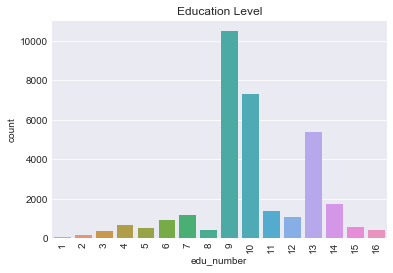

In [203]:
sns.countplot(x=(adult_df['edu_number']))
plt.title('Education Level')
plt.xticks(rotation=90)
plt.show()

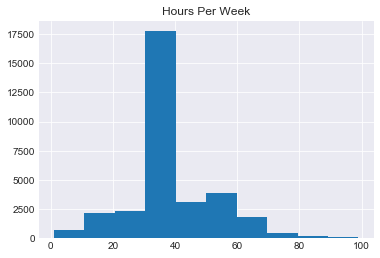

In [64]:
plt.hist(adult_df['hours_week'])
plt.title('Hours Per Week')
plt.show()

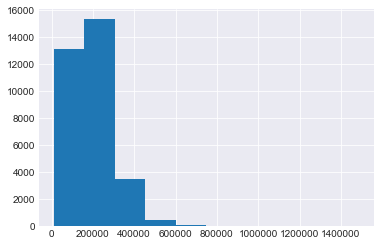

In [65]:
plt.hist(adult_df['final_weight']) #demographic weights
plt.show()

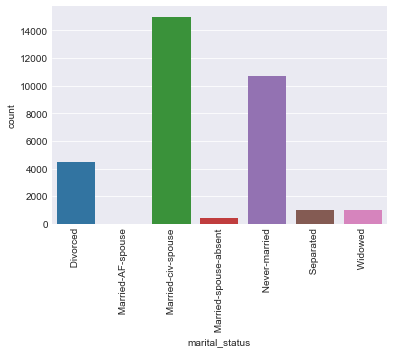

In [182]:
adult_df['marital_status'] = adult_df['marital_status'].astype('category')
adult_df['marital_category'] = adult_df['marital_status'].cat.codes

sns.countplot(adult_df['marital_status'])
plt.xticks(rotation=90)
plt.show()

In [105]:
adult_df.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [67]:
adult_df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [68]:
adult_df['race'] = adult_df['race'].astype('category')

In [69]:
adult_df['race_category'] = adult_df['race'].cat.codes


In [70]:
adult_df['native_country'].value_counts(ascending=False)

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

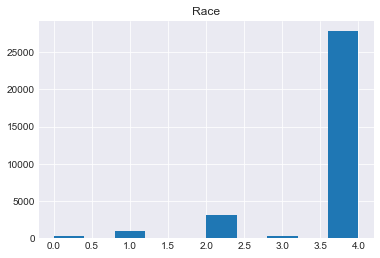

In [71]:
plt.hist(adult_df['race_category'])
plt.title('Race')
plt.show() # well damn, that's a lot of white people

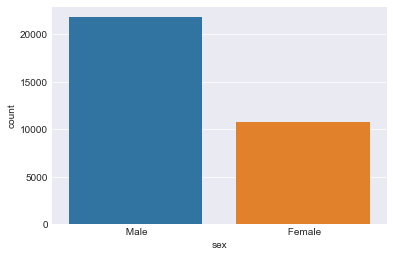

In [72]:
sns.countplot(adult_df['sex'])
plt.show()

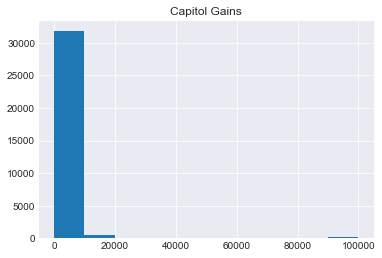

In [73]:
plt.hist(adult_df['cap_gain'])
plt.title('Capitol Gains')
plt.show()

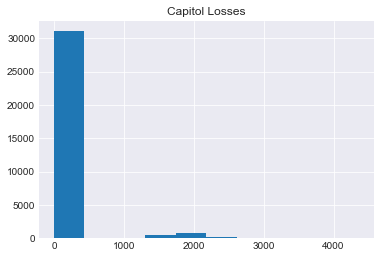

In [74]:
plt.hist(adult_df['cap_loss'])
plt.title('Capitol Losses')
plt.show()

In [200]:
filtered_df = adult_df.filter(['age',
                             'race',
                             'race_category',
                             'final_weight',
                             'edu_number',
                             'cap_gain',
                             'cap_loss',
                             'hours_week',
                             'sex',
                             'marital_status',
                             'marital_category',
                             'make_50K'])

filtered_df.head()

,age,race,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,sex,marital_status,marital_category,make_50K
0,50,White,4,83311,13,0,0,13,Male,Married-civ-spouse,2,<=50K
1,38,White,4,215646,9,0,0,40,Male,Divorced,0,<=50K
2,53,Black,2,234721,7,0,0,40,Male,Married-civ-spouse,2,<=50K
3,28,Black,2,338409,13,0,0,40,Female,Married-civ-spouse,2,<=50K
4,37,White,4,284582,14,0,0,40,Female,Married-civ-spouse,2,<=50K


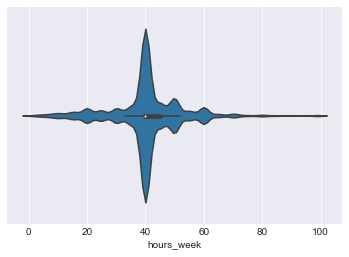

In [76]:
sns.violinplot(x=filtered_df['hours_week'])
plt.show()

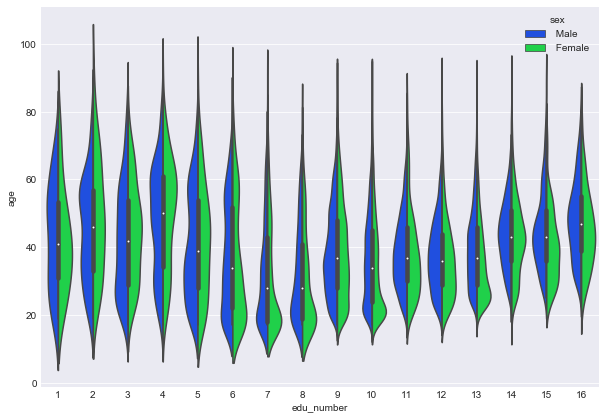

In [187]:
size = (10, 7)
fig, ax = plt.subplots(figsize=size)

sns.violinplot(x='edu_number',
               y='age',
               data=filtered_df,
               hue='sex',
               split=True,
               palette='bright',
               ax=ax)
plt.show()

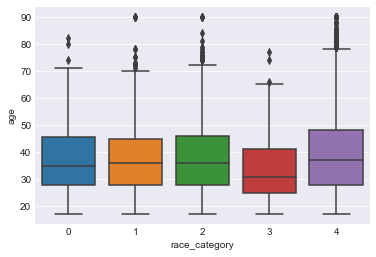

In [79]:
sns.boxplot(x='race_category', y='age', data=filtered_df)
plt.show()

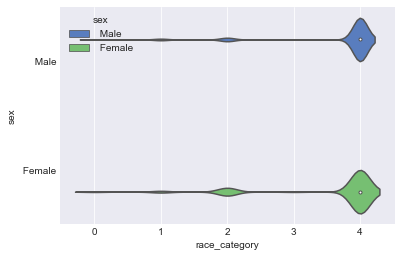

In [80]:
sns.violinplot(x='race_category',
               y='sex',
               data=filtered_df,
               hue='sex',
               palette='muted')
plt.show()

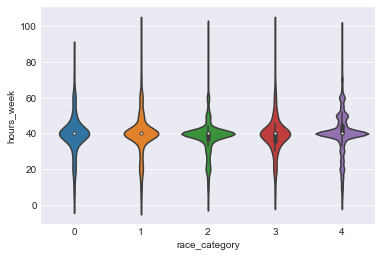

In [81]:
sns.violinplot(x='race_category', y='hours_week', data=filtered_df)
plt.show()

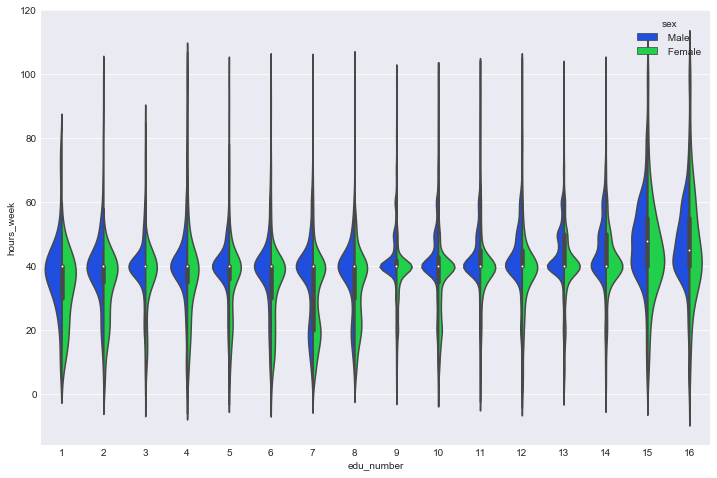

In [82]:
size = (12, 8)
fig, ax = plt.subplots(figsize=size)

sns.violinplot(x='edu_number',
               y='hours_week',
               data=filtered_df,
               hue='sex',
               split=True,
               palette='bright',
               ax=ax)
plt.show()

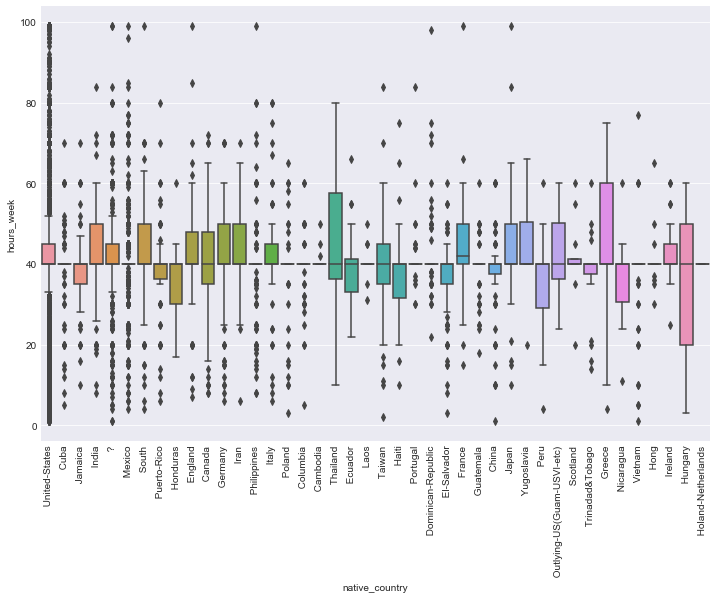

In [195]:
size = (12, 8)
fig, ax = plt.subplots(figsize=size)

sns.boxplot(x='native_country', y='hours_week', data=adult_df, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [198]:
adult_df.head()

,age,working_class,final_weight,education,edu_number,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_week,native_country,make_50K,marital_category,race_category
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,4
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2,2
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,2,4


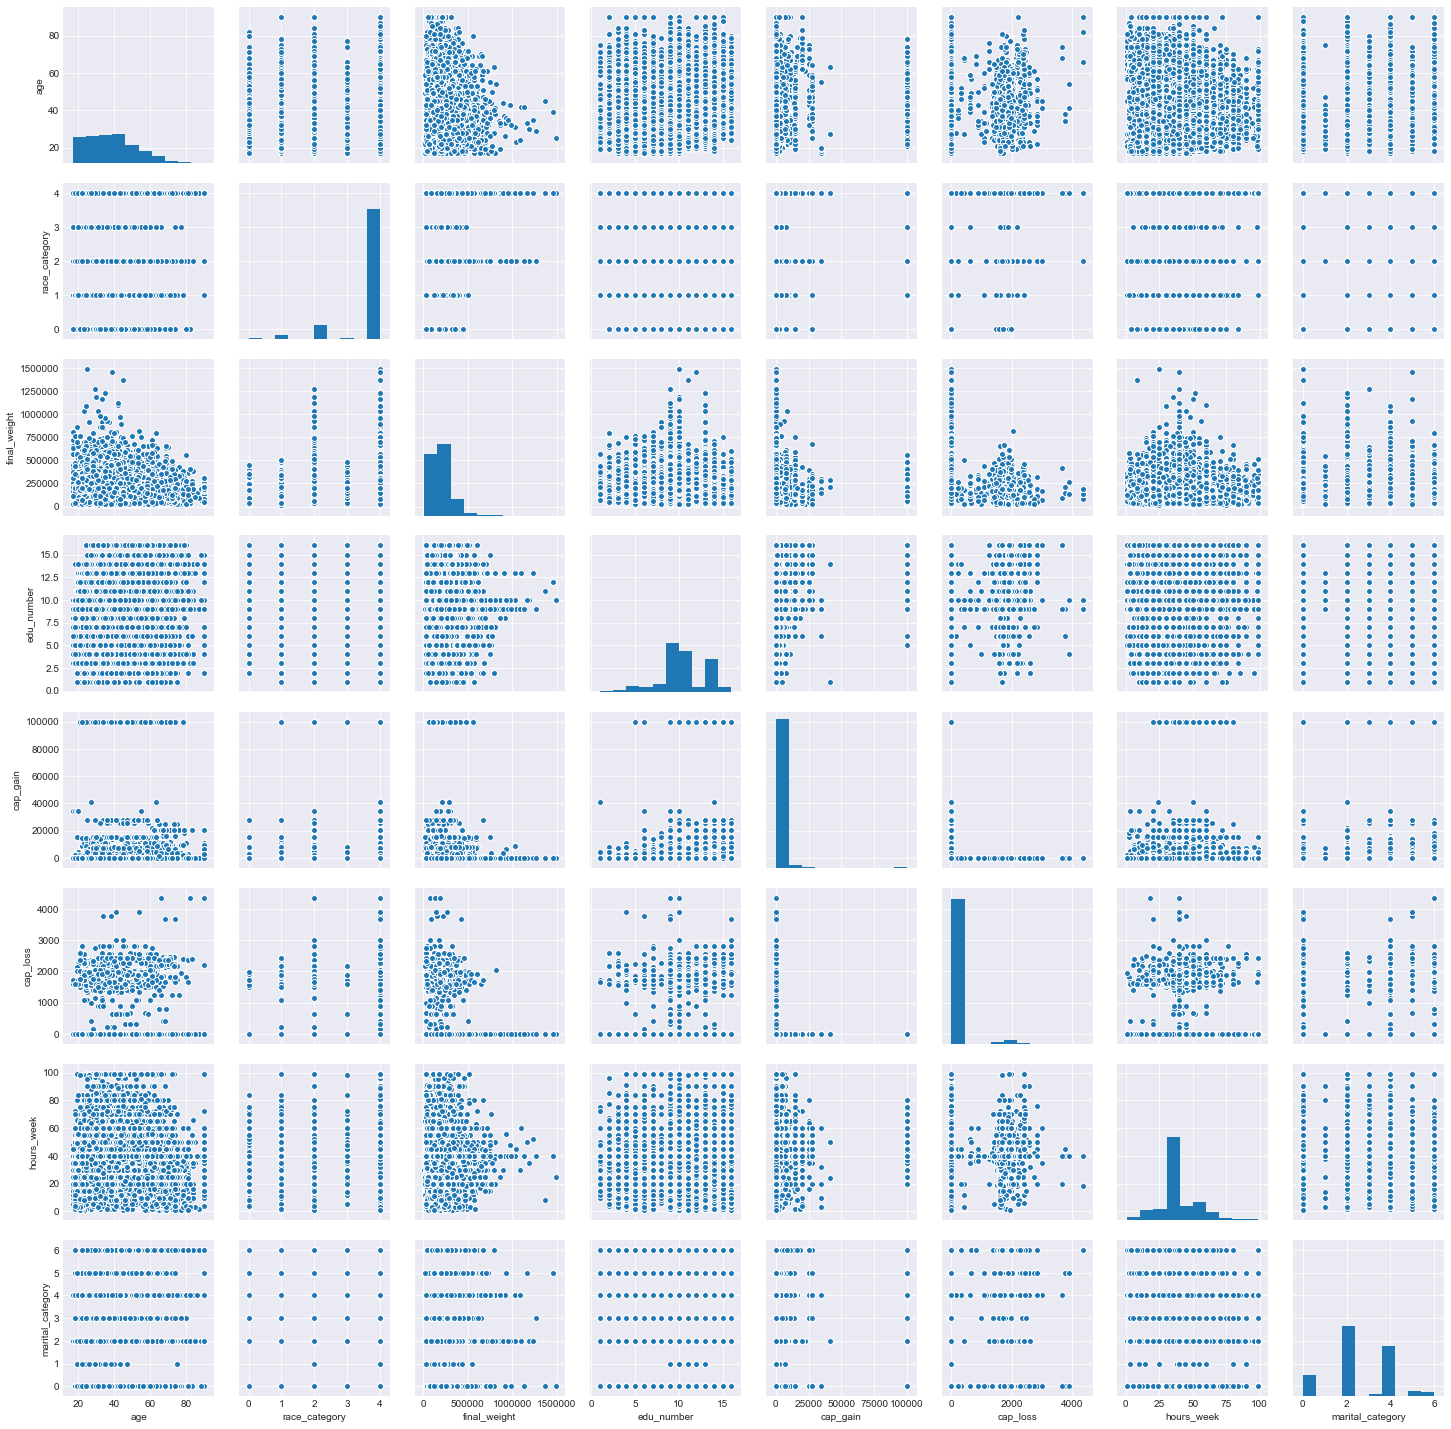

In [202]:
sns.pairplot(filtered_df)
plt.show()

# Creating features for: 
    'High School Graduates'
    'Some College'
    'Higher Education'
    'General Education'
    'USNative'
    'Non-USNative'
    'Work 40 hours'
    'Work 40 Plus Hours'
    'Work Less than 40 Hours'
    'Under 30'
    '30s'
    '40s'
    '50s'
    '60andOver'
    'Married'
    'Not Married'

In [177]:
filtered_df['HS_Grad'] = np.where((adult_df['education'].isin(['HS-grad'])), 1, 0)
filtered_df.head()

,age,race,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,sex,marital_status,...,US_Native,Not_US_Native,Married,Not_Married,40_Hours,40_Plus_Hours,Less_40_Hours,Under_30,30s,60_Plus
0,50,White,4,83311,13,0,0,13,Male,Married-civ-spouse,...,0,1,0,0,0,0,1,0,0,0
1,38,White,4,215646,9,0,0,40,Male,Divorced,...,0,1,0,0,1,0,0,0,0,0
2,53,Black,2,234721,7,0,0,40,Male,Married-civ-spouse,...,0,1,0,0,1,0,0,0,0,0
3,28,Black,2,338409,13,0,0,40,Female,Married-civ-spouse,...,0,1,0,0,1,0,0,1,0,0
4,37,White,4,284582,14,0,0,40,Female,Married-civ-spouse,...,0,1,0,0,1,0,0,0,0,0


In [271]:
filtered_df['Some_College'] = np.where((adult_df['education'].isin(['Some-college'])), 1, 0)

In [272]:
filtered_df['Higher_Edu'] = np.where((adult_df['education'].isin(['Masters',
                                                                  'Bachelors',
                                                                  'Doctorate'])), 1, 0)

In [273]:
filtered_df['General_Edu'] = np.where((adult_df['education'].isin(['1st-4th',
                                                                   '5th-6th',
                                                                   '7th-8th',
                                                                   '9th',
                                                                   '10th',
                                                                   '11th',
                                                                   '12th'])), 1, 0)

In [137]:
filtered_df['US_Native'] = np.where((adult_df['native_country'].isin(['United-States'])), 1, 0)

In [274]:
filtered_df.head()

,age,race,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,sex,marital_status,marital_category,make_50K,50K_category,Yes,No,60_Plus,Some_College,Higher_Edu,General_Edu
0,50,White,4,83311,13,0,0,13,Male,Married-civ-spouse,2,<=50K,0,1,0,0,0,0,0
1,38,White,4,215646,9,0,0,40,Male,Divorced,0,<=50K,0,1,0,0,0,0,0
2,53,Black,2,234721,7,0,0,40,Male,Married-civ-spouse,2,<=50K,0,1,0,0,0,0,0
3,28,Black,2,338409,13,0,0,40,Female,Married-civ-spouse,2,<=50K,0,1,0,0,0,0,0
4,37,White,4,284582,14,0,0,40,Female,Married-civ-spouse,2,<=50K,0,1,0,0,0,0,0


In [275]:
filtered_df['Not_US_Native'] = np.where((~adult_df['native_country'].isin(['United-States'])), 1, 0)

In [276]:
filtered_df['Married'] = np.where((adult_df['marital_status'].isin(['Married-civ-spouse',
                                                                    'Married-spouse-absent',
                                                                    'Married-AF-spouse'])), 1, 0)

In [277]:
filtered_df['Not_Married'] = np.where((adult_df['marital_status'].isin(['Divorced',
                                                                        'Separted',
                                                                        'Widowed',
                                                                        'Never-married'])), 1, 0)

In [278]:
filtered_df['40_Hours'] = np.where(adult_df['hours_week']==40, 1, 0)

In [279]:
filtered_df['40_Plus_Hours'] = np.where(adult_df['hours_week']>40, 1, 0)

In [280]:
filtered_df['Less_40_Hours'] = np.where(adult_df['hours_week']<40, 1, 0)

In [281]:
filtered_df['Under_30'] = np.where(adult_df['age']<=29, 1, 0)

In [282]:
filtered_df['60_Plus'] = np.where(adult_df['age']>=60, 1, 0)

In [211]:
adult_df['make_50K'] = adult_df['make_50K'].astype('category')

filtered_df['50K_category'] = adult_df['make_50K'].cat.codes


In [283]:
filtered_df.head()

,age,race,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,sex,marital_status,...,Some_College,Higher_Edu,General_Edu,Not_US_Native,Married,Not_Married,40_Hours,40_Plus_Hours,Less_40_Hours,Under_30
0,50,White,4,83311,13,0,0,13,Male,Married-civ-spouse,...,0,0,0,1,0,0,0,0,1,0
1,38,White,4,215646,9,0,0,40,Male,Divorced,...,0,0,0,1,0,0,1,0,0,0
2,53,Black,2,234721,7,0,0,40,Male,Married-civ-spouse,...,0,0,0,1,0,0,1,0,0,0
3,28,Black,2,338409,13,0,0,40,Female,Married-civ-spouse,...,0,0,0,1,0,0,1,0,0,1
4,37,White,4,284582,14,0,0,40,Female,Married-civ-spouse,...,0,0,0,1,0,0,1,0,0,0


In [178]:
from sklearn import preprocessing


In [179]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [199]:
from scipy.stats import zscore

In [226]:
Outcome_df = pd.DataFrame()
filtered_df['Yes'] = np.where(filtered_df['50K_category']==0, 1, 0)
filtered_df['No'] = np.where(filtered_df['50K_category']==1, 1, 0)
Outcome_df.head()

""


In [254]:
filtered_df.columns

Index(['age', 'race', 'race_category', 'final_weight', 'edu_number',
       'cap_gain', 'cap_loss', 'hours_week', 'sex', 'marital_status',
       'marital_category', 'make_50K', 'Over_50K', 'Under_50K', '50K_category',
       'Yes', 'No', '60_Plus'],
      dtype='object')

In [253]:
filtered_df['60_Plus'].value_counts()

0    29916
1     2644
Name: 60_Plus, dtype: int64

In [260]:
from sklearn.feature_selection import SelectKBest, chi2

In [301]:
X.drop('race', axis=1, inplace=True)

In [262]:
y = filtered_df["50K_category"]

In [293]:
X = filtered_df.drop("marital_status", 1)

In [305]:
X.drop('sex', 1, inplace=True)

In [304]:
X.describe()

,age,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,marital_category,60_Plus,Some_College,Higher_Edu,General_Edu,Not_US_Native,Married,Not_Married,40_Hours,40_Plus_Hours,Less_40_Hours,Under_30
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.0,32560.0,32560.0,32560.0,32560.0,32560.0,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.665848,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,2.611794,0.081204,0.0,0.0,0.0,1.0,0.0,0.0,0.467322,0.294257,0.238421,0.298249
std,13.640642,0.848817,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,1.506225,0.273152,0.0,0.0,0.0,0.0,0.0,0.0,0.498939,0.455715,0.426125,0.457497
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,2.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,2.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,4.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000
max,90.000000,4.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,6.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [291]:
clf = SelectKBest(chi2, k = 10)

In [306]:
clf.fit(X,y)

SelectKBest(k=10, score_func=<function chi2 at 0x119a33d90>)

In [310]:
clf.scores_

array([  8.60073746e+03,   3.30379810e+01,   1.71812389e+05,
         2.40174782e+03,   8.21977263e+07,   1.37204879e+06,
         6.47643538e+03,   1.12331938e+03,   4.83003527e-01,
                    nan,              nan,              nan,
         0.00000000e+00,              nan,              nan,
         6.25895531e+01,   1.36933143e+03,   9.02021329e+02,
         1.88127446e+03])

In [311]:
clf.pvalues_

array([  0.00000000e+000,   9.03760035e-009,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   2.82226857e-246,   4.87064983e-001,
                     nan,               nan,               nan,
         1.00000000e+000,               nan,               nan,
         2.54600405e-015,   9.70123819e-300,   3.56786604e-198,
         0.00000000e+000])

In [312]:
zip(X.columns, clf.pvalues_)

In [313]:
print(zip(X.columns, clf.pvalues_))

In [314]:
for pair in zip(X.columns, clf.pvalues_):
    print(pair)

('age', 0.0)
('race_category', 9.0376003516319649e-09)
('final_weight', 0.0)
('edu_number', 0.0)
('cap_gain', 0.0)
('cap_loss', 0.0)
('hours_week', 0.0)
('marital_category', 2.8222685668526554e-246)
('60_Plus', 0.48706498296171741)
('Some_College', nan)
('Higher_Edu', nan)
('General_Edu', nan)
('Not_US_Native', 1.0)
('Married', nan)
('Not_Married', nan)
('40_Hours', 2.5460040472755533e-15)
('40_Plus_Hours', 9.7012381858829286e-300)
('Less_40_Hours', 3.5678660421153419e-198)
('Under_30', 0.0)


In [315]:
X_new = clf.transform(X)

In [317]:
X_new[0]

array([   50, 83311,    13,     0,     0,    13,     2,     0,     1,     0])

In [318]:
X.head(1)

,age,race_category,final_weight,edu_number,cap_gain,cap_loss,hours_week,marital_category,60_Plus,Some_College,Higher_Edu,General_Edu,Not_US_Native,Married,Not_Married,40_Hours,40_Plus_Hours,Less_40_Hours,Under_30
0,50,4,83311,13,0,0,13,2,0,0,0,0,1,0,0,0,0,1,0


In [319]:
clf.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,  True], dtype=bool)

In [320]:
X.columns[clf.get_support()]

Index(['age', 'final_weight', 'edu_number', 'cap_gain', 'cap_loss',
       'hours_week', 'marital_category', '40_Plus_Hours', 'Less_40_Hours',
       'Under_30'],
      dtype='object')

In [321]:
pca = PCA(n_components = 3)

In [324]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [325]:
pca.components_

array([[ -9.90529158e-06,  -1.71116195e-07,   9.99999999e-01,
         -1.05197138e-06,   3.07099327e-05,  -3.91673715e-05,
         -2.19576517e-06,   4.02193664e-07,  -1.22364247e-07,
         -3.47886365e-40,  -1.23967870e-41,  -1.50478728e-56,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
          1.51963764e-07,  -1.36310050e-07,  -1.56537136e-08,
          2.30471944e-07],
       [  1.43514603e-04,   1.28155465e-06,  -3.07758791e-05,
          4.27211399e-05,   9.99998483e-01,  -1.72983966e-03,
          1.31096359e-04,  -8.85276576e-06,   9.19474823e-07,
          7.85303101e-40,   3.05741820e-40,   2.10964283e-54,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -2.88553350e-06,   5.08473233e-06,  -2.19919883e-06,
         -4.45998282e-06],
       [  2.01710102e-03,   4.01526263e-05,   3.91385059e-05,
          5.32981670e-04,   1.72929251e-03,   9.99994804e-01,
          1.73645637e-03,  -1.32080616e-04,   8.18996605e-06,
         -7.6796

In [327]:
pca.components_.T* np.sqrt(pca.explained_variance_)

array([[ -1.04548514e+00,   1.05989840e+00,   8.12363708e-01],
       [ -1.80609969e-02,   9.46466564e-03,   1.61709979e-02],
       [  1.05548144e+05,  -2.27289101e-01,   1.57625728e-02],
       [ -1.11033627e-01,   3.15508436e-01,   2.14652098e-01],
       [  3.24137640e+00,   7.38528884e+03,   6.96452217e-01],
       [ -4.13404338e+00,  -1.27753849e+01,   4.02736144e+02],
       [ -2.31758939e-01,   9.68185944e-01,   6.99337378e-01],
       [  4.24507949e-02,  -6.53803313e-02,  -5.31939146e-02],
       [ -1.29153192e-02,   6.79059745e-03,   3.29841249e-03],
       [ -3.67187602e-35,   5.79969902e-36,  -3.09286903e-34],
       [ -1.30845786e-36,   2.25799508e-36,  -6.27261152e-36],
       [ -1.58827505e-51,   1.55803453e-50,  -3.29701134e-50],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  1.60394933e-02,  -2.13105307e-02,  -9.3057381

In [328]:
loading = pca.components_.T* np.sqrt(pca.explained_variance_)